In [1]:
import urllib.request 
import os

url="http://biostat.app.vumc.org/wiki/pub/Main/DataSets/titanic3.xls"
filepath="data/titanic3.xls"
if not os.path.isfile(filepath):
    result=urllib.request.urlretrieve(url,filepath)
    print('download: ', result)

In [2]:
import numpy as np
import pandas as pd
all_df = pd.read_excel(filepath)
all_df[:5]
cols=['survived', 'name', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
all_df=all_df[cols]
all_df[:5]

df=all_df.drop(['name'], axis=1)
all_df.isnull().sum()
age_mean=df['age'].mean()
df['age'] = df['age'].fillna(age_mean)
age_mean=df['fare'].mean()
df['fare'] = df['fare'].fillna(age_mean)
df['sex'] = df['sex'].map({'female':0, 'male':1}).astype(int)
x_onehot_df=pd.get_dummies(data=df, columns=['embarked'])
x_onehot_df[:2]
ndarray=x_onehot_df.values
ndarray.shape
ndarray[:2]
labels=ndarray[:, 0]
features=ndarray[:, 1:]
labels[:3]
features[:3]

array([[  1.    ,   0.    ,  29.    ,   0.    ,   0.    , 211.3375,
          0.    ,   0.    ,   1.    ],
       [  1.    ,   1.    ,   0.9167,   1.    ,   2.    , 151.55  ,
          0.    ,   0.    ,   1.    ],
       [  1.    ,   0.    ,   2.    ,   1.    ,   2.    , 151.55  ,
          0.    ,   0.    ,   1.    ]])

In [3]:
from sklearn import preprocessing
minmax_scale=preprocessing.MinMaxScaler(feature_range=(0,1))
Scaledfeatures=minmax_scale.fit_transform(features)
Scaledfeatures[:2]

msk = np.random.rand(len(all_df))<0.8
# print(msk)
train_df = all_df[msk]
test_df = all_df[~msk]
print('total:', len(all_df), ' train: ', len(train_df), ' test: ', len(test_df))

total: 1309  train:  1063  test:  246


In [4]:
def preprocessdata(raw_df):
    df=raw_df.drop(['name'], axis=1)
    age_mean=df['age'].mean()
    df['age'] = df['age'].fillna(age_mean)
    fare_mean=df['fare'].mean()
    df['fare'] = df['fare'].fillna(fare_mean)
    df['sex'] = df['sex'].map({'female':0, 'male':1}).astype(int)
    x_onehot_df=pd.get_dummies(data=df, columns=['embarked'])
    
    ndarray=x_onehot_df.values
    labels=ndarray[:, 0]
    features=ndarray[:, 1:]
    
    minmax_scale=preprocessing.MinMaxScaler(feature_range=(0,1))
    Scaledfeatures=minmax_scale.fit_transform(features)
    
    return Scaledfeatures,labels

In [5]:
train_feature, train_label = preprocessdata(train_df)
test_feature, test_label = preprocessdata(test_df)
train_feature[:2]
train_label[:2]

array([1., 0.])

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(units=40, input_dim=9, kernel_initializer='uniform', activation='relu')) #para: 9*40+40
model.add(Dense(units=30, kernel_initializer='uniform', activation='relu')) #para: 40*30+30
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid')) #para: 30*1+1

In [7]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                400       
_________________________________________________________________
dense_1 (Dense)              (None, 30)                1230      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 31        
Total params: 1,661
Trainable params: 1,661
Non-trainable params: 0
_________________________________________________________________
None


In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history = model.fit(x=train_feature, y=train_label, validation_split=0.1, epochs=30, batch_size=30, verbose=2)

Epoch 1/30
32/32 - 0s - loss: 0.6879 - accuracy: 0.5941 - val_loss: 0.6609 - val_accuracy: 0.7944
Epoch 2/30
32/32 - 0s - loss: 0.6548 - accuracy: 0.6077 - val_loss: 0.5519 - val_accuracy: 0.7944
Epoch 3/30
32/32 - 0s - loss: 0.5833 - accuracy: 0.7123 - val_loss: 0.4749 - val_accuracy: 0.7850
Epoch 4/30
32/32 - 0s - loss: 0.5178 - accuracy: 0.7835 - val_loss: 0.4495 - val_accuracy: 0.7944
Epoch 5/30
32/32 - 0s - loss: 0.4966 - accuracy: 0.7699 - val_loss: 0.4463 - val_accuracy: 0.7944
Epoch 6/30
32/32 - 0s - loss: 0.4818 - accuracy: 0.7793 - val_loss: 0.4389 - val_accuracy: 0.8037
Epoch 7/30
32/32 - 0s - loss: 0.4730 - accuracy: 0.7751 - val_loss: 0.4327 - val_accuracy: 0.7944
Epoch 8/30
32/32 - 0s - loss: 0.4688 - accuracy: 0.7824 - val_loss: 0.4331 - val_accuracy: 0.8224
Epoch 9/30
32/32 - 0s - loss: 0.4662 - accuracy: 0.7772 - val_loss: 0.4323 - val_accuracy: 0.8318
Epoch 10/30
32/32 - 0s - loss: 0.4620 - accuracy: 0.7845 - val_loss: 0.4315 - val_accuracy: 0.8318
Epoch 11/30
32/32 -

In [9]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train history')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

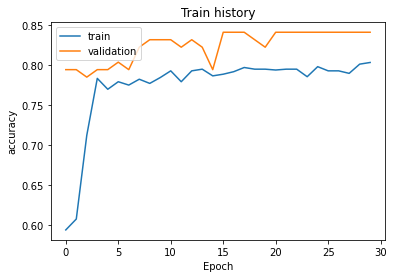

In [10]:
show_train_history(train_history, 'accuracy', 'val_accuracy')

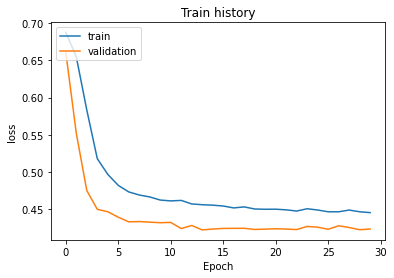

In [11]:
show_train_history(train_history, 'loss', 'val_loss')

In [12]:
scores = model.evaluate(test_feature, test_label, verbose=1)
print()
print('accuracy = ', scores[1])

8/8 [==============================] - 0s 1ms/step - loss: 0.4488 - accuracy: 0.8089

accuracy =  0.8089430928230286


In [13]:
Jack = pd.Series([0, 'Jack', 3, 'male', 23, 1, 0, 5.0000, 'S'])
Rose = pd.Series([1, 'Rose', 1, 'female', 20, 1, 0, 100.0000, 'S'])
JR_df = pd.DataFrame([list(Jack),list(Rose)], columns=['survived', 'name', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked'])
all_df = pd.concat([all_df, JR_df])
all_df[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,0,Jack,3,male,23.0,1,0,5.0,S
1,1,Rose,1,female,20.0,1,0,100.0,S


In [14]:
all_feature, label = preprocessdata(all_df)

In [15]:
Predicted_Prob = model.predict(all_feature)
Predicted_Prob[:10]

array([[0.9826646 ],
       [0.50778824],
       [0.97777045],
       [0.32508007],
       [0.9716902 ],
       [0.25121164],
       [0.93361294],
       [0.29084235],
       [0.9259697 ],
       [0.25937378]], dtype=float32)

In [16]:
pd=all_df
pd.insert(len(all_df.columns), 'Predicted_Probability', Predicted_Prob)
pd[-2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,Predicted_Probability
0,0,Jack,3,male,23.0,1,0,5.0,S,0.132336
1,1,Rose,1,female,20.0,1,0,100.0,S,0.976911


In [17]:
pd[(pd['survived']==0)&(pd['Predicted_Probability']>0.9)]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,Predicted_Probability
2,0,"Allison, Miss. Helen Loraine",1,female,2.0,1,2,151.5500,S,0.977770
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0,1,2,151.5500,S,0.971690
105,0,"Evans, Miss. Edith Corse",1,female,36.0,0,0,31.6792,C,0.984203
169,0,"Isham, Miss. Ann Elizabeth",1,female,50.0,0,0,28.7125,C,0.981375
286,0,"Straus, Mrs. Isidor (Rosalie Ida Blun)",1,female,63.0,1,0,221.7792,S,0.950382
